### Regresion lineal

Sirve para predecir una variable en funcion de otra, por medio de la obtencion de la funcion lineal que mas aproxima la nube de puntos que conforman ambas varibles en un grafico cartesiano. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importar datos

In [6]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion_simple.csv')

In [7]:
df.describe() # desbalanceada la simetria a izquierda en cuanto a años de experiencia (la mediana esta mas a la iz que la media)

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df2.shape

(30, 2)

In [13]:
df2.corr()# las variables se explican mutuamente

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

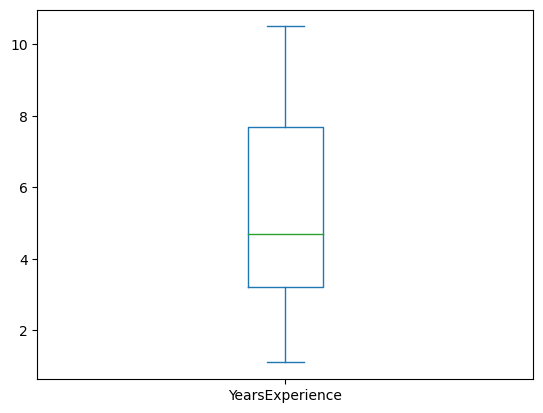

In [14]:
df2['YearsExperience'].plot.box()

<AxesSubplot:>

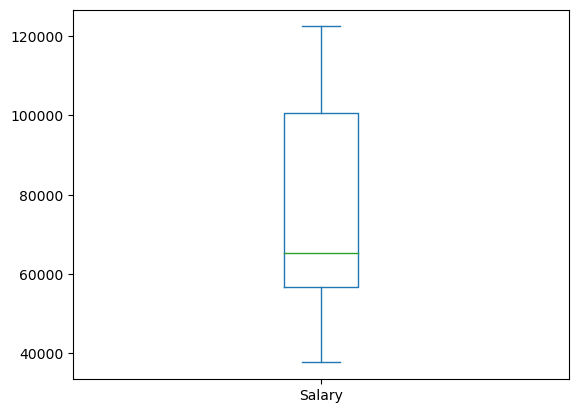

In [8]:
df['Salary'].plot.box()

In [15]:
## En los salarios hay mas dispersion

In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

#### TRANFORMACION DE LAS VARIABLES

#### Missing values no hay

In [17]:
df.isnull().values.any()

False

#### Dummificacion / recategorizacion

no hay variables categoricas

#### Division en variable dependiente e independiente.

In [18]:
# En este caso tengo dos variables con una se intenta explicar la otra.
# Cada una puede actuar como dependiente o independiente pero escogemos Salario como objetivo porque tiene mas sentido

In [19]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

#### Obtengo lote training y test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1987)

In [23]:
x_train

array([1.1, 3.2, 7.1, 1.5, 9. , 2.9, 6.8, 1.3, 3.7, 4. , 9.6, 2.2, 6. ,
       5.1, 5.9, 5.3, 8.2, 3.2, 9.5, 3. , 3.9, 2. , 4.5, 4. ])

In [24]:
x_test

array([ 4.9,  7.9, 10.5,  4.1, 10.3,  8.7])

In [25]:
y_train

array([ 39343.,  64445.,  98273.,  37731., 105582.,  56642.,  91738.,
        46205.,  57189.,  55794., 112635.,  39891.,  93940.,  66029.,
        81363.,  83088., 113812.,  54445., 116969.,  60150.,  63218.,
        43525.,  61111.,  56957.])

In [26]:
y_test

array([ 67938., 101302., 121872.,  57081., 122391., 109431.])

#### Normalizacion no hace falta en este caso

Los modelos de regresion lineal simple y multiple no son sensibles al escalado de las variables.
No es necesario normalizar en modelos de regresion lineal.

#### Creacion del modelo

Creación

In [20]:
from sklearn.linear_model import LinearRegression

# scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# sklearn.linear_model.LinearRegression

In [27]:
regresion=LinearRegression()
regresion.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

Prediccion

In [30]:
y_pred=regresion.predict(x_test.reshape(-1,1))

In [34]:
y_pred

array([[ 72660.43185848],
       [101209.58268693],
       [125952.18007158],
       [ 65047.3249709 ],
       [124048.90334969],
       [108822.68957452]])

In [32]:
y_test

array([ 67938., 101302., 121872.,  57081., 122391., 109431.])

#### Evaluación del modelo

##### R cuadrado o coheficiente de determinacion
 
Refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Sera un valor entre -1 (en relaciones inversamente proporcionales) y 1 (en relaciones directamente proporcionales)

Cuando mas aproxime R^2 a 1 o -1 mejor será el modelo

In [35]:
from sklearn.metrics import r2_score

Primero lo vemos sobre los datos de entrenamiento

In [37]:
# coef R2
r2_score(y_train.reshape(-1,1), regresion.predict(x_train.reshape(-1,1)))

0.9426487631517732

In [38]:
r2_score(y_test.reshape(-1,1), regresion.predict(x_test.reshape(-1,1)))

0.9727559282344286

In [40]:
## no deberia dar mejor en test que en training

# Hay un sobreajuste porque los datos son pocos

array([ 39343.,  64445.,  98273.,  37731., 105582.,  56642.,  91738.,
        46205.,  57189.,  55794., 112635.,  39891.,  93940.,  66029.,
        81363.,  83088., 113812.,  54445., 116969.,  60150.,  63218.,
        43525.,  61111.,  56957.])

<function matplotlib.pyplot.show(close=None, block=None)>

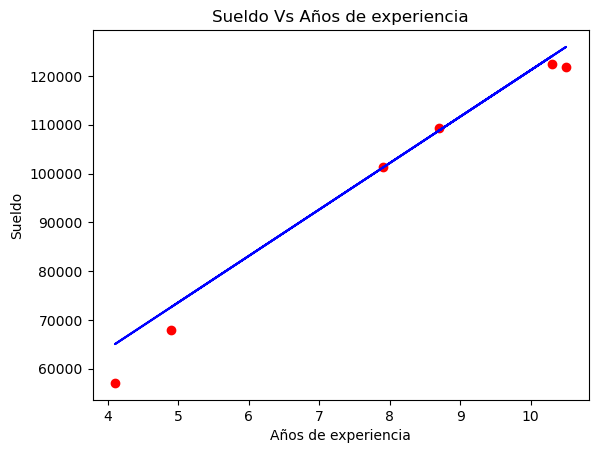

In [43]:
plt.title('Sueldo Vs Años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Sueldo')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regresion.predict(x_test.reshape(-1,1)), color='blue')
plt.show

### Mismo ejercicio con el lote de los motores

Analizamos: horsepower Vs cylinders para regresion lineal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [347]:
# Carga de los datos
df_mpg=pd.read_csv(r"C:\Users\carolina\Desktop\FormDataAnalyst\Visualizacion\datos_visualizazion_mpg.csv")

In [348]:
df_mpg.shape

(398, 9)

In [349]:
df_mpg.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick
139,14.0,8,302.0,140.0,4638,16.0,74,usa,ford gran torino (sw)
51,30.0,4,79.0,70.0,2074,19.5,71,europe,peugeot 304
357,32.9,4,119.0,100.0,2615,14.8,81,japan,datsun 200sx


In [693]:
##### Trabajare solo cylinders y horsepower
dfCH=df_mpg[['cylinders','horsepower']]

In [368]:
#dfCH.values

In [369]:
dfCH.sample(4)

,cylinders,horsepower
70,8,190.0
193,6,81.0
177,4,95.0
387,6,85.0


In [666]:
dfCH.corr() 

,cylinders,horsepower
cylinders,1.000000,0.842983
horsepower,0.842983,1.000000


In [371]:
# correlacion cilindros/horsepower 0.84

In [372]:
dfCH.describe()

,cylinders,horsepower
count,398.000000,392.000000
mean,5.454774,104.469388
std,1.701004,38.491160
min,3.000000,46.000000
25%,4.000000,75.000000
50%,4.000000,93.500000
75%,8.000000,126.000000
max,8.000000,230.000000


In [667]:
dfCH['cylinders'].value_counts() # podria verse como una variable categorica. Son solo 5 valores diferentes
                                # Variable cuantitativa con valores discretos

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [355]:
dfCH['horsepower'].value_counts() # variable cuantitativa

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64

<AxesSubplot:>

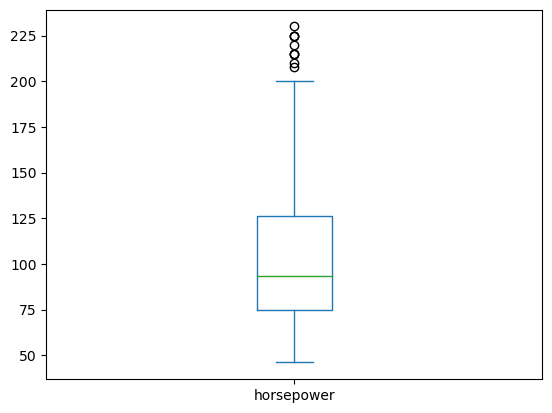

In [668]:
dfCH['horsepower'].plot.box() # hay outliers

In [494]:
# solo hay Outliers en horsepower

In [694]:
RI=dfCH.horsepower.quantile([.75])[0.75]-dfCH.horsepower.quantile([.25])[0.25]
RI

51.0

In [695]:
dfCH.horsepower.quantile([.75])[0.75]-dfCH.horsepower.quantile([.25])[0.25]

51.0

In [696]:
# Determino los limites para OUTLIERS
out_low=abs(dfCH['horsepower'].quantile([.25])[0.25]-1.5*RI)
out_hig=abs(dfCH['horsepower'].quantile([.75])[0.75]+1.5*RI)


In [697]:
out_low,out_hig
#(1.5, 202.5)

(1.5, 202.5)

In [698]:
dfCH[dfCH['horsepower']<1.5].count() # <2.5 no hay YA SE VEIA EN LA GRAFICA QUE ESTAN POR ARRIBA

cylinders     0
horsepower    0
dtype: int64

In [699]:
dfCH[dfCH['horsepower']>202].count() # HAY 10

cylinders     10
horsepower    10
dtype: int64

In [700]:
dfCH.shape

(398, 2)

In [701]:
# Valores Nan 

dfCH.isnull().any()

cylinders     False
horsepower     True
dtype: bool

In [702]:
dfCH[dfCH['horsepower'].isna()]

,cylinders,horsepower
32,4,NaN
126,6,NaN
330,4,NaN
336,4,NaN
354,4,NaN
374,4,NaN


In [703]:
list(dfCH[dfCH['horsepower'].isna()].index)

[32, 126, 330, 336, 354, 374]

##### Valoracion de Nan y outliers (estan en horsepower)

Nan = 6

Outliers = 10

Total 16



In [528]:
16*100/398

4.0201005025125625

#### Estrategia de casos a modelar 

* RegLin1 : eliminando Nan y outliers
* RegLin2 : reconstruir Nan y outliers segun origen por mediana de la clase
* RegLin3 : reconstruir Nan y outliers con la media general




#### Tratamiento de missing

CASO 1 ELIMINAR NANs Y OUTLIERS

In [704]:
#RegLin1
dfCH[dfCH['horsepower']<out_hig].shape  # aqui tampoco entran los NaN por eso da 382 (398 - 10 outliers - 6 Nan)

(382, 2)

In [705]:
100-dfCH[dfCH['horsepower']<out_hig].shape[0]*100/dfCH.shape[0] # porcentaje que elimino

4.0201005025125625

In [786]:
# Genero el df de la reg lineal 1 sin NaN y sin outliers

RegLin1=dfCH[dfCH['horsepower']<=out_hig]
RegLin1.shape ## Ya estan eliminados 

(382, 2)

In [789]:
del dfRegLin1 ## eliminar variable borrar variable

CASO 2 RECONSTRUCCION DE NAN Y OUTLIERS SEGUN MEDIANA DE LA CLASE

In [707]:
# RegLin2
list(dfCH[dfCH['horsepower']>out_hig].index)

[6, 7, 8, 13, 25, 27, 67, 94, 95, 116]

In [708]:
dfCH.isna().value_counts()

cylinders  horsepower
False      False         392
           True            6
dtype: int64

In [709]:
dfCH.isna().any()

cylinders     False
horsepower     True
dtype: bool

In [710]:
dfCH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cylinders   398 non-null    int64  
 1   horsepower  392 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


In [711]:
# COPIO EL DF PARA EL CASO 2 (CUIDADO AL COPIAR CON = ES UNA ASIGNACION POR REFERENCIA!!!)

RegLin2=dfCH.copy()

In [712]:
# cambio a nan los outliers utilizando la lista de indices 

RegLin2.iloc[list(RegLin2[RegLin2['horsepower']>out_hig].index),1]=np.nan

#NOTA IMPORTANTE: LAS ASIGNACIONES HAN DE HACERSE CON ILOC POR INDICES (PASAR LISTA DE INDICES DE LA CONSULTA)

In [713]:
RegLin2.isna().value_counts()  # correcto 6 que habia mas 10 de outliers = 16

cylinders  horsepower
False      False         382
           True           16
dtype: int64

In [714]:
RegLin2.iloc[[6, 7, 8, 13, 25, 27, 67, 94, 95, 116],:] # aqui estan ya como nan

,cylinders,horsepower
6,8,NaN
7,8,NaN
8,8,NaN
13,8,NaN
25,8,NaN
27,8,NaN
67,8,NaN
94,8,NaN
95,8,NaN
116,8,NaN


In [658]:
# Observo distribucion para saber si reemplazare con median o mean

RegLin2[RegLin2['cylinders']==8].describe() # esta por la mediana
RegLin2[RegLin2['cylinders']==4].describe() # esta por la mediana
RegLin2[RegLin2['cylinders']==6].describe() # esta por la mediana

,cylinders,horsepower
count,84.0,83.000000
mean,6.0,101.506024
std,0.0,14.310472
min,6.0,72.000000
25%,6.0,92.500000
50%,6.0,100.000000
75%,6.0,110.000000
max,6.0,165.000000


* Obtengo los indices con los que recuperar los nan y las medianas para la asignacion

In [715]:

# Los de cilindro=8

list(RegLin2[RegLin2['horsepower'].isnull()].query('cylinders==8').index) # lista de indices para la asignacion
RegLin2[RegLin2['cylinders']==8].median()['horsepower'] #mediana con la que reemplazar los nulos


150.0

In [716]:
#asignacion
RegLin2.iloc[list(RegLin2[RegLin2['horsepower'].isnull()].query('cylinders==8').index),1]=RegLin2[RegLin2['cylinders']==8].median()['horsepower']


In [717]:
# asignacion cilindros 4 y 6
RegLin2.iloc[list(RegLin2[RegLin2['horsepower'].isnull()].query('cylinders==6').index),1]=RegLin2[RegLin2['cylinders']==6].median()['horsepower']
RegLin2.iloc[list(RegLin2[RegLin2['horsepower'].isnull()].query('cylinders==4').index),1]=RegLin2[RegLin2['cylinders']==4].median()['horsepower']


In [719]:
# comprobacion YA NO HAY NULOS
RegLin2.isnull().any()

cylinders     False
horsepower    False
dtype: bool

In [721]:
RegLin2.iloc[[6, 7, 8, 13, 25, 27, 67, 94, 95, 116],:] # LOS REGISTROS MODIFICARON CORRECTAMENTE EN CILINDROS 8

,cylinders,horsepower
6,8,150.0
7,8,150.0
8,8,150.0
13,8,150.0
25,8,150.0
27,8,150.0
67,8,150.0
94,8,150.0
95,8,150.0
116,8,150.0


In [724]:
# indices de nulos en cilindro 4
RegLin2.iloc[[32, 330, 336, 354, 374],:] # LOS REGISTROS MODIFICARON CORRECTAMENTE EN CILINDROS 4

,cylinders,horsepower
32,4,78.0
330,4,78.0
336,4,78.0
354,4,78.0
374,4,78.0


In [726]:
# indice de nulos en cilindro 6
RegLin2.iloc[[126],:] # REGISTRO MODIFICADO CORRECTAMENTE EN CILINDROS 6

,cylinders,horsepower
126,6,100.0


CASO 3 RECONSTRUCCION DE NAN Y OUTLIERS SEGUN MEDIANA GENERAL

In [729]:
RegLin3=dfCH.copy()  # hacer un COPY para copia por valor, sino se hace copia por referencia.

In [751]:
RegLin3.describe() # me da que el que mal distribuye es cilindro 8
# reemplazare por la mediana porque hay mala distribucion

,cylinders,horsepower
count,103.0,103.000000
mean,8.0,158.300971
std,0.0,28.453552
min,8.0,90.000000
25%,8.0,140.000000
50%,8.0,150.000000
75%,8.0,175.000000
max,8.0,230.000000


In [758]:
RegLin3[RegLin3['cylinders']!=8].describe() # cilindros 8 hace que la distribucion se desequilibre 

# En el caso 2 al corregir outliers se ha corregido
# RegLin2[RegLin2['cylinders']==8].describe()

,cylinders,horsepower
count,295.000000,289.000000
mean,4.566102,85.283737
std,0.919296,17.859282
min,3.000000,46.000000
25%,4.000000,71.000000
50%,4.000000,86.000000
75%,6.000000,97.000000
max,6.000000,165.000000


In [766]:
dfCH.median()['horsepower'] ## valor de reemplazo (mediana general)

93.5

In [780]:
indices3=list(RegLin3[RegLin3['horsepower'].isnull()].index) # estos tienen que reasignarse con la mediana general

In [781]:
indices3

[32, 126, 330, 336, 354, 374]

In [783]:
indices3.extend(list(RegLin3[RegLin3['horsepower']>out_hig].index))   # esto tambien

In [784]:
indices3 # estos son los 16 reg 

[32, 126, 330, 336, 354, 374, 6, 7, 8, 13, 25, 27, 67, 94, 95, 116]

In [785]:
# asignacion

RegLin3.iloc[indices3,1]=dfCH.median()['horsepower']

In [790]:
RegLin3.iloc[indices3,:] # COMPROBADO

,cylinders,horsepower
32,4,93.5
126,6,93.5
330,4,93.5
336,4,93.5
354,4,93.5
374,4,93.5
6,8,93.5
7,8,93.5
8,8,93.5
13,8,93.5


#### YA ESTAN LOS DATOS PREPARADOS PARA SEPARAR LOTES DE TRAINING Y TEST Y MODELAR CON REG LINEAL

CASO 1 RegLin1

In [853]:
RegLin1.sample(3)

,cylinders,horsepower
239,4,67
275,6,125
81,4,92


* Typificacion de datos

In [848]:
RegLin1['horsepower']=RegLin1['horsepower'].astype(np.int64)

C:\Users\carolina\AppData\Local\Temp\ipykernel_4692\1524505426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RegLin1['horsepower']=RegLin1['horsepower'].astype(np.int64)


In [849]:
RegLin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   cylinders   382 non-null    int64
 1   horsepower  382 non-null    int64
dtypes: int64(2)
memory usage: 9.0 KB


* Separar los datos en variable dependiente e independiente

In [855]:
x1=RegLin1.iloc[:,1].values
y1=RegLin1.iloc[:,0].values

* Obtener lote training y test (70/30)

In [856]:
from sklearn.model_selection import train_test_split

In [858]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state=1987)

In [859]:
x1_train.size, x1_test.size, y1_train.size, y1_test.size,

(267, 115, 267, 115)

In [874]:
# Las variables de entrada del predictor son enteras pero el resultado no

* Creacion del modelo

In [860]:
from sklearn.linear_model import LinearRegression

In [862]:
regresion=LinearRegression()
regresion.fit(x1_train.reshape(-1,1),y1_train.reshape(-1,1))

LinearRegression()

* Prediccion


In [864]:
# Calculo de la prediccion
y1_pred=regresion.predict(x1_test.reshape(-1,1))


In [880]:
y1_pred.reshape(1,-1)[:,0:10] 

array([[3.24131812, 3.7153925 , 7.46488992, 4.44805292, 3.80158785,
        8.75782007, 4.62044361, 6.99081554, 4.62044361, 7.03391321]])

In [883]:
y1_pred.round().reshape(1,-1)[:,0:10] 

array([[3., 4., 7., 4., 4., 9., 5., 7., 5., 7.]])

In [881]:
y1_test.reshape(1,-1)[:,0:10] 

array([[4, 4, 8, 4, 4, 8, 4, 8, 4, 8]], dtype=int64)

In [886]:
y1_pred.round().reshape(1,-1)[:,0:10]

array([[3., 4., 7., 4., 4., 9., 5., 7., 5., 7.]])

In [893]:
pd.DataFrame(y1_test, columns=['cylinders'])['cylinders'].unique() 

array([4, 8, 6, 3, 5], dtype=int64)

In [895]:
pd.DataFrame(y1_pred.round(), columns=['cylinders'])['cylinders'].unique() # en la prediccion salen mas valores de cilindro

array([ 3.,  4.,  7.,  9.,  5., 10.,  8.,  6.])

* Evaluación del modelo

In [896]:
from sklearn.metrics import r2_score

In [897]:
# Primero lo vemos sobre los datos de entrenamiento

# coef R2
r2_score(y1_train.reshape(-1,1), regresion.predict(x1_train.reshape(-1,1)))


0.7319762520294548

In [899]:
# Luego sobre los datos de testing (y vs y')

r2_score(y1_test.reshape(-1,1), regresion.predict(x1_test.reshape(-1,1)))


0.7267285109810515

In [902]:
# R2 entre 'y' real (los datos reales de test) y la prediccion y' 
r2_score(y1_test.reshape(-1,1), y1_pred.reshape(-1,1)) # esto es lo mismo que lo que esta arriba

0.7267285109810515

In [905]:
# R2 en el conjunto total de datos
r2_score(y1.reshape(-1,1), regresion.predict(x1.reshape(-1,1)) )

# Es un valor intermedio entre el R2 de training (datos que el modelo conoce bien) y los de testing (datos que no conoce),
# tiene logica porque el conjunto de datos contiene ambos lotes y su R2 queda entremedias.

0.7306817349039965

CASO 2 RegLin2

* Typificacion de datos

In [906]:
RegLin2['horsepower']=RegLin2['horsepower'].astype(np.int64)

* Separar los datos en variable dependiente e independiente

In [907]:

x2=RegLin2.iloc[:,1].values
y2=RegLin2.iloc[:,0].values

* Obtener lote training y test (70/30)

In [908]:
from sklearn.model_selection import train_test_split

In [909]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state=1987)
x2_train.size, x2_test.size, y2_train.size, y2_test.size,
#(278, 120, 278, 120) # bueno deberian ser 279 y 119

(278, 120, 278, 120)

* Creacion del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [910]:
regresion=LinearRegression()
regresion.fit(x2_train.reshape(-1,1),y2_train.reshape(-1,1))

LinearRegression()

* Prediccion

In [911]:
# Calculo de la prediccion
y2_pred=regresion.predict(x2_test.reshape(-1,1))


In [912]:
pd.DataFrame(y2_test, columns=['cylinders'])['cylinders'].unique()

array([4, 8, 6, 5, 3], dtype=int64)

In [913]:
pd.DataFrame(y2_pred.round(), columns=['cylinders'])['cylinders'].unique() 
# en la prediccion salen 7 y 9 que no son opciones de cilindro validas

array([6., 4., 5., 3., 7., 8., 9.])

* Evaluacion del modelo

In [ ]:
from sklearn.metrics import r2_score

In [914]:
# Sobre los datos de entrenamiento

# coef R2
r2_score(y2_train.reshape(-1,1), regresion.predict(x2_train.reshape(-1,1)))

0.7731104200562937

In [915]:
# Luego sobre los datos de testing (y vs y')
r2_score(y2_test.reshape(-1,1), regresion.predict(x2_test.reshape(-1,1)))
## bajo respecto del primer modelo que dio 0.73

0.6732352596268554

In [916]:
# Luego sobre el total de los datos 
r2_score(y2.reshape(-1,1), regresion.predict(x2.reshape(-1,1))) # de nuevo es un intermedio

0.7455896274945737

CASO 3 RegLin3


* Typificacion de datos

In [918]:
RegLin3['horsepower']=RegLin3['horsepower'].astype(np.int64)

* Separar los datos en variable dependiente e independiente

In [919]:
x3=RegLin3.iloc[:,1].values
y3=RegLin3.iloc[:,0].values

* Obtener lote training y test (70/30)

In [ ]:
from sklearn.model_selection import train_test_split

In [920]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3, random_state=1987)
x3_train.size, x3_test.size, y3_train.size, y3_test.size

(278, 120, 278, 120)

* Creacion del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [921]:
regresion=LinearRegression()
regresion.fit(x3_train.reshape(-1,1),y3_train.reshape(-1,1))

LinearRegression()

* Prediccion

In [922]:
# Calculo de la prediccion
y3_pred=regresion.predict(x3_test.reshape(-1,1))


In [923]:
pd.DataFrame(y3_pred.round(), columns=['cylinders'])['cylinders'].unique() 
# en la prediccion salen 7 y 9 que no son opciones de cilindro validas

array([6., 4., 5., 3., 7., 8., 9.])

* Evaluacion del modelo

In [ ]:
from sklearn.metrics import r2_score

In [924]:
# Sobre los datos de entrenamiento

# coef R2
r2_score(y3_train.reshape(-1,1), regresion.predict(x3_train.reshape(-1,1))) # da peor (el caso 1 da 0.77)

0.6789936462036045

In [925]:
# Luego sobre los datos de testing (y vs y')
r2_score(y3_test.reshape(-1,1), regresion.predict(x3_test.reshape(-1,1)))

0.6404448908781373

In [926]:
# Luego sobre el total de los datos 
r2_score(y3.reshape(-1,1), regresion.predict(x3.reshape(-1,1))) # de nuevo es un intermedio

0.6690373714601803

* Grafica de la RL

<function matplotlib.pyplot.show(close=None, block=None)>

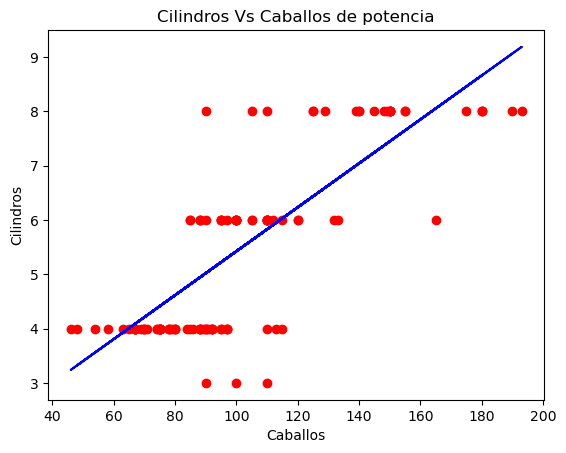

In [929]:
plt.title('Cilindros Vs Caballos de potencia')
plt.xlabel('Caballos')
plt.ylabel('Cilindros')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regresion.predict(x_test.reshape(-1,1)), color='blue')
plt.show

In [792]:
## Completare los nulos con la media segun cilindros

# df_mpg['horsepower'].fillna(value=0) 
# OTRA ESTRATEGIA PARA CAMBIAR LOS DATOS NULOS PUEDE SER ASIGNAR UN VALOR UNICO Y ASI LUEGO PODER OBTENER POR CONDICION LOS NULOS 


In [827]:
#dfCH[dfCH[dfCH['horsepower'].fillna(value=0)]['horsepower']==0]
#dfCH[dfCH['horsepower'].fillna(value=0).notnull()].query(('horsepower==0'))
 #& ('cylinders==4')

#RegLin2.iloc[list(RegLin2[RegLin2['horsepower'].isnull()].query('cylinders==4').index),1]=RegLin2[RegLin2['cylinders']==4].median()['horsepower']
#dfCH[dfCH[dfCH['horsepower'].fillna(value=0).notnull()]['horsepower']==0]

In [928]:
## NO ESTABA ASIGNANDO!!!!

#dfCH[dfCH[dfCH['cylinders']==4][['horsepower']].isna()] #.fillna(value=78, inplace=True)#.any()
#dfCH.iloc[list(dfCH[dfCH['cylinders']==4]['horsepower'].isnull().index)]

### Imputacion segmentada con la libreria !!


In [ ]:
# Primero tengo que crear el array 

In [442]:
aCH=dfCH.iloc[:,:].values # asi será un array NO un df

In [444]:
# aCH[aCH[:,0]==4]  esto es lo que quiero mof¡dificar

In [445]:
from sklearn.impute import SimpleImputer

* CILINDROS=4 (deberia completar con 78)

In [447]:
# Calculo con la mediana solo para los casos de cilindro==4 
# (solo se imputara en col==1 que es horsepower porque solo aqui hay nulos)
imputacion=SimpleImputer(missing_values=np.nan , strategy='median').fit(aCH[aCH[:,0]==4].reshape(-1, 2)) # me pide el reshape
imputacion

SimpleImputer(strategy='median')

In [448]:
# Imputacion
aCH[aCH[:,0]==4]=imputacion.transform(aCH[aCH[:,0]==4].reshape(-1, 2)) 

In [449]:
# aCH Vs dfCH.values ESTA CORRECTO, HA IMPUTADO CON 78 LOS 5 CASOS DE NaN EN CILINDROS = 4

* CILINDROS=6 (deberia completar con 100) 

In [451]:
# Calculo con la media solo para los casos de cilindro==6 
# (solo se imputara en col==1 que es horsepower porque solo aqui hay nulos)
imputacion=SimpleImputer(missing_values=np.nan , strategy='median').fit(aCH[aCH[:,0]==6].reshape(-1, 2)) # me pide el reshape
imputacion

SimpleImputer(strategy='median')

In [452]:
aCH[aCH[:,0]==6]=imputacion.transform(aCH[aCH[:,0]==6].reshape(-1, 2)) # vuelvo a poner el reshape (en la asignacion no)

# respecto del reshape no esta cambiando nada del formato de la matriz, no se porque lo pide #aCH#.reshape(-1, 2)

In [453]:
# aCH Vs dfCH.values ESTA CORRECTO, HA IMPUTADO CON 100 UN CASO DE NaN EN CILINDROS = 6 (LOS DE CILINDRO 4 YA ESTABAN CORREGIDOS)

In [454]:
## AHORA VUELVO A FORMATO DATAFRAME PARA CONTINUAR LA TRANSFORMACION

In [457]:
df=pd.DataFrame(aCH, columns=('cylinders', 'horsepower'))

In [458]:
df.shape, dfCH.shape

((398, 2), (398, 2))

<AxesSubplot:>

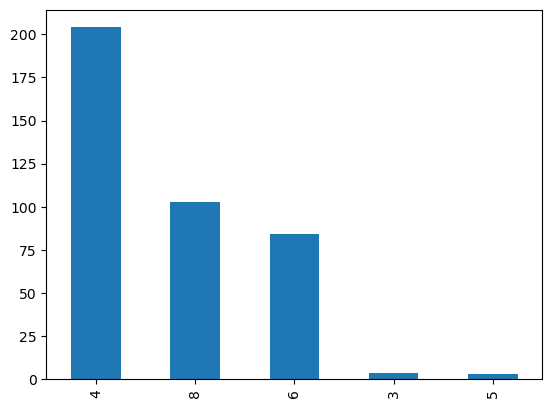

In [930]:
# Diagrama de frecuencia de Cilindros 
dfCH['cylinders'].value_counts().sort_values(ascending=False).plot.bar()

In [482]:
df2.shape, dfCH.shape ## 11 menos outliers

((387, 2), (398, 2))

##### CALCULAR REGRESION LINEAL

##### Division en variable objetivo y dependiente

In [484]:
df2.head(3)

,cylinders,horsepower
0,8,130
1,8,165
2,8,150


In [485]:
y=df2.iloc[:,0].values # pongo la variable mas sencilla (con menos valores) como objetivo

In [486]:
x=df2.iloc[:,1].values

##### Division en entrenamiento y test con SKLEARN

In [483]:
from sklearn.model_selection import train_test_split


In [489]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1987) # todo en este orden

In [490]:
x_train

array([ 81, 165, 145,  60, 110,  48,  70, 150,  90,  93, 150,  83, 115,
       110, 100,  88,  58,  97,  60,  61, 170,  65,  84,  68, 115,  52,
       110, 107, 105,  65,  70,  75,  90,  76, 175, 140,  84,  97, 100,
        88, 170,  65, 145, 190,  68, 150, 105,  86,  72, 135,  88,  95,
        70,  97,  67, 100,  49, 180, 150, 130, 150, 153,  67, 110,  85,
       110, 100,  70, 160, 145,  92,  98, 129,  96,  97, 152,  95,  76,
        63,  95,  88, 110, 100,  96, 175,  90,  70,  46,  90,  76,  86,
        80,  65, 145,  86, 150, 150,  72, 175,  90, 102,  64,  83,  86,
       150, 190, 150,  52,  78,  85,  90,  71, 105,  98,  69, 150, 170,
        97,  85, 125,  68,  71, 153, 100,  88,  81, 105, 175,  78,  78,
        95, 105, 160,  95,  78,  67, 120,  48,  82, 140, 150,  65,  90,
        88, 105,  63,  60, 116, 110, 100,  67, 110,  96,  90, 140, 150,
        87,  70,  75, 108,  75, 100, 150,  94,  60,  88,  78, 140,  83,
        84,  68,  67,  90,  75,  76,  95, 198,  90, 105,  75, 18

In [491]:
x_test

array([125, 125,  92,  70, 105, 155,  86, 110,  90,  78,  88,  70, 150,
       105, 133,  92, 110, 149,  58,  78, 100,  95,  67, 100,  80, 110,
        80,  92, 193,  63,  69, 129, 145, 148, 110,  84,  97,  88,  65,
        75,  89, 100,  75,  88, 110, 155,  75,  80,  85,  97, 150,  71,
       110, 140, 110, 100, 112,  75,  95, 110,  67, 113,  85,  90,  90,
       180, 105, 150, 139, 110, 175,  90, 110,  90,  79,  54,  88, 100,
        95,  88,  85,  67,  90, 140,  75, 120,  97, 115, 115,  75,  88,
       165, 150,  48, 150, 100, 100,  95,  70,  67,  74,  74, 120,  78,
        97, 180,  95,  67,  46,  92,  95,  91,  75, 132, 180,  88, 190],
      dtype=int64)

##### Creacion del modelo

In [492]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresion=LinearRegression()
regresion.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

In [1028]:
y_pred=regresion.predict(x_test.reshape(-1, 1) )

In [1030]:
y_pred[0]

array([6.4350252])

In [978]:
### Voy a tratar la columna Name para separar la marca del nombre 

df_mpg['marca']=df_mpg['name'].apply(lambda x: x[0:x.index(' ')].upper() if ' ' in x else x.upper())
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick,FORD
64,15.0,8,318.0,150.0,4135,13.5,72,usa,plymouth fury iii,PLYMOUTH
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun 210,DATSUN
107,18.0,6,232.0,100.0,2789,15.0,73,usa,amc gremlin,AMC
294,34.1,4,86.0,65.0,1975,15.2,79,japan,maxda glc deluxe,MAXDA


In [975]:
df_mpg['marca'].unique() 

array(['CHEVROLET', 'BUICK', 'PLYMOUTH', 'AMC', 'FORD', 'PONTIAC',
       'DODGE', 'TOYOTA', 'DATSUN', 'VOLKSWAGEN', 'PEUGEOT', 'AUDI',
       'SAAB', 'BMW', 'CHEVY', 'HI', 'MERCURY', 'OPEL', 'FIAT',
       'OLDSMOBILE', 'CHRYSLER', 'MAZDA', 'VOLVO', 'RENAULT', 'TOYOUTA',
       'MAXDA', 'HONDA', 'SUBARU', 'CHEVROELT', 'CAPRI', 'VW',
       'MERCEDES-BENZ', 'CADILLAC', 'MERCEDES', 'VOKSWAGEN', 'TRIUMPH',
       'NISSAN'], dtype=object)

 En esta lista hay errores de tipeo. Hay que transformar para corregirlos.
 
 Unificar las siguientes categorias de marca:
 
        TOYOTA, TOYOUTA
        VOLKSWAGEN, VW, VOKSWAGEN
        MERCEDES-BENZ, MERCEDES
        CHEVROLET, CHEVROELT

In [993]:
df_mpg[df_mpg['marca']=='VOKSWAGEN']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit,VOKSWAGEN


In [990]:
# indice de fila a modificar
df_mpg[df_mpg['marca']=='MERCEDES'].index

Int64Index([], dtype='int64')

In [994]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='VOKSWAGEN'].index,9]='VOLKSWAGEN'
df_mpg.iloc[df_mpg[df_mpg['marca']=='VW'].index,9]='VOLKSWAGEN'
df_mpg.iloc[df_mpg[df_mpg['marca']=='TOYOUTA'].index,9]='TOYOTA'

In [996]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='CHEVROELT'].index,9]='CHEVROLET'

In [1024]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='MAXDA'].index,9]='MAZDA'

<AxesSubplot:>

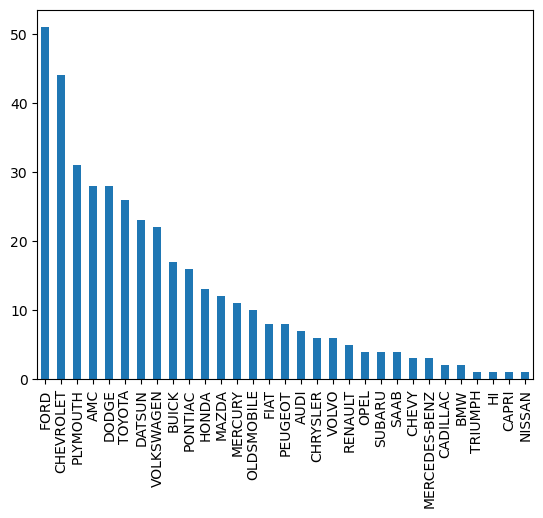

In [1025]:
df_mpg['marca'].value_counts().sort_values(ascending=False).plot.bar()


In [1026]:
# vuelvo a controlar
# df_mpg['marca'].unique().size # son 32
df_mpg['marca'].unique().reshape(31,1)#.sort()

array([['CHEVROLET'],
       ['BUICK'],
       ['PLYMOUTH'],
       ['AMC'],
       ['FORD'],
       ['PONTIAC'],
       ['DODGE'],
       ['TOYOTA'],
       ['DATSUN'],
       ['VOLKSWAGEN'],
       ['PEUGEOT'],
       ['AUDI'],
       ['SAAB'],
       ['BMW'],
       ['CHEVY'],
       ['HI'],
       ['MERCURY'],
       ['OPEL'],
       ['FIAT'],
       ['OLDSMOBILE'],
       ['CHRYSLER'],
       ['MAZDA'],
       ['VOLVO'],
       ['RENAULT'],
       ['HONDA'],
       ['SUBARU'],
       ['CAPRI'],
       ['MERCEDES-BENZ'],
       ['CADILLAC'],
       ['TRIUMPH'],
       ['NISSAN']], dtype=object)